In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
df = pd.read_csv('Uterine Corpus Endometrial Carcinoma.csv')

In [8]:
df.head()

,Patient ID,Sample ID,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type
0,TCGA-2E-A9G8,TCGA-2E-A9G8-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,TCGA-4E-A92E,TCGA-4E-A92E-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,TCGA-5B-A90C,TCGA-5B-A90C-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,TCGA-5S-A9Q8,TCGA-5S-A9Q8-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,TCGA-A5-A0G1,TCGA-A5-A0G1-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DECEASED,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,White,UCEC_POLE,Serous Endometrial Adenocarcinoma


In [10]:
df.describe()

,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score
count,515.000000,519.000000,526.00000,526.000000,528.000000
mean,1046.423301,0.185959,63.76616,0.438948,6.395890
std,2734.365494,0.226088,11.06003,0.239666,10.175853
min,7.000000,0.000000,31.00000,0.237000,0.000000
25%,47.000000,0.003600,57.00000,0.283950,0.110000
50%,76.000000,0.067800,64.00000,0.311300,0.435000
75%,563.500000,0.314450,71.00000,0.543225,10.117500
max,25696.000000,0.948700,90.00000,1.304900,40.430000


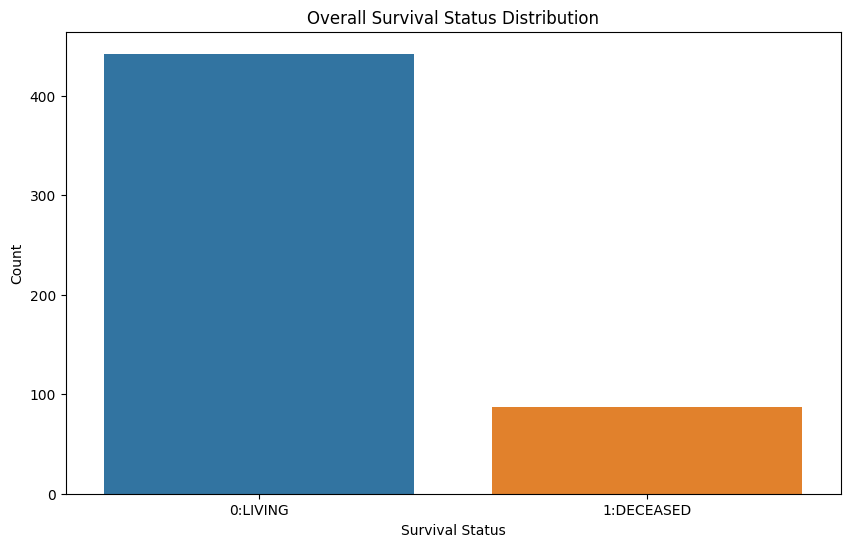

In [12]:
# Survival status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Overall Survival Status', data=df)
plt.title('Overall Survival Status Distribution')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

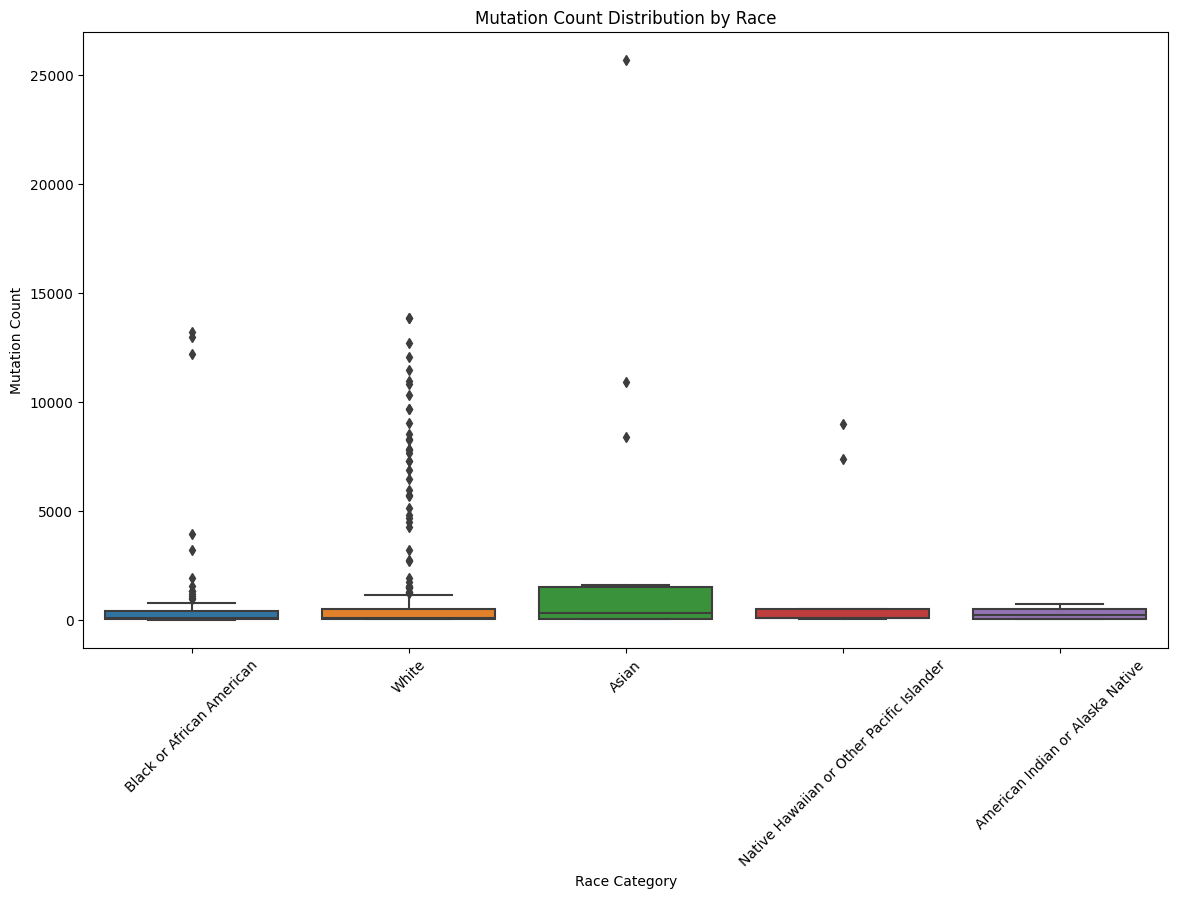

In [14]:
# Mutation count distribution by race
plt.figure(figsize=(14, 8))
sns.boxplot(x='Race Category', y='Mutation Count', data=df)
plt.title('Mutation Count Distribution by Race')
plt.xlabel('Race Category')
plt.ylabel('Mutation Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Fill missing values for numeric columns with their median
data = df
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

In [19]:
# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\rp325\AppData\Local\Temp\ipykernel_5436\2613035519.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [20]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [21]:
# Define features and target
X = data.drop(['Patient ID', 'Sample ID', 'Overall Survival Status'], axis=1)
y = data['Overall Survival Status']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Make predictions
y_pred = model.predict(X_test)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [44]:
print(f'Accuracy: {accuracy*100}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 95.28301886792453
Confusion Matrix:
[[92  0]
 [ 5  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        92
           1       1.00      0.64      0.78        14

    accuracy                           0.95       106
   macro avg       0.97      0.82      0.88       106
weighted avg       0.96      0.95      0.95       106



In [36]:
# Prediction for new data (example)
new_data = pd.DataFrame({
    'Cancer Type Detailed': ['Uterine Endometrioid Carcinoma'],
    'Disease Free Status': ['0:DiseaseFree'],
    'Disease-specific Survival status': ['0:ALIVE OR DEAD TUMOR FREE'],
    'Mutation Count': [50],
    'Fraction Genome Altered': [0.0581],
    'Diagnosis Age': [51],
    'MSI MANTIS Score': [0.3199],
    'MSIsensor Score': [0.09],
    'Race Category': ['Black or African American'],
    'Subtype': ['UCEC_CN_LOW'],
    'Tumor Type': ['Endometrioid Endometrial Adenocarcinoma']
})
# Encode new data
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Standardize new data
new_data = scaler.transform(new_data)

# Predict
new_prediction = model.predict(new_data)
print(f'New Prediction: {new_prediction[0]}')

New Prediction: 0
